Developed at TH Rosenheim  
&copy; 2020/21 Dominik Stecher, TH Rosenheim  
&copy; 2021/22 Florian Bayeff-Filloff, TH Rosenheim  

# Demonstrator - Data Analysis & Augmentation Toolkit (DAAT)

Dieses Jupyter Notebook zeigt am Beispiel des Iris Datensatzes exemplarisch die Verwendung des DAAT.

### Imports

In [1]:
import pandas as pd

# DAAT Imports
import daat
from daat import Instruction as daat_ins
from daat import daat_test

syn_samples = 1e4

# Iris Datensatz

In [2]:
# Iris Datensatz als pandas Dataframe importieren
import pandas as pd
from sklearn import datasets

iris_ds = datasets.load_iris()
iris_ds_f_names = iris_ds.feature_names
iris_ds_t_names = iris_ds.target_names

iris_df = pd.DataFrame(iris_ds.data)
iris_df['class'] = iris_ds.target

iris_col = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.columns = iris_col
iris_tar = iris_col[4]

### DAAT Analyser

In [3]:
# Analyse initialisieren
analyser_iris = daat.Analyser(iris_df, iris_tar)

In [4]:
# Informationsanzeige zum Datensatz
analyser_iris.show_dataset_info()

processing features:   0%|          | 0/5 [00:00<?, ?it/s]

Datensatz Übersicht
Feature Anzahl:           5
Anazhl Einträge:        150
leere Einträge:           0
----------------------------------------------------------------------------------------------------------------
kleinstes Feature : class      | Anzahl 3          | ML Art: Klassifikation
größtes Feature   : petal_len  | Anzahl 43         | ML Art: Regression

Feature Übersicht
----------------------------------------------------------------------------------------------------------------
Feature              | Type       | Gesamt     | Einzel     | NaNs       || min        | 50%        | max        
----------------------------------------------------------------------------------------------------------------
sepal_len            | float64    |        150 |         35 |          0 ||       4.30 |       5.80 |       7.90 
sepal_wid            | float64    |        150 |         23 |          0 ||       2.00 |       3.00 |       4.40 
petal_len            | float64    |        150 |

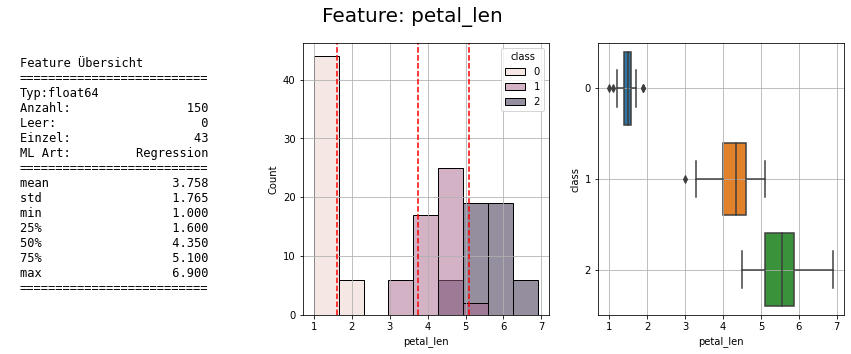

plotting data:   0%|          | 0/5 [00:00<?, ?it/s]

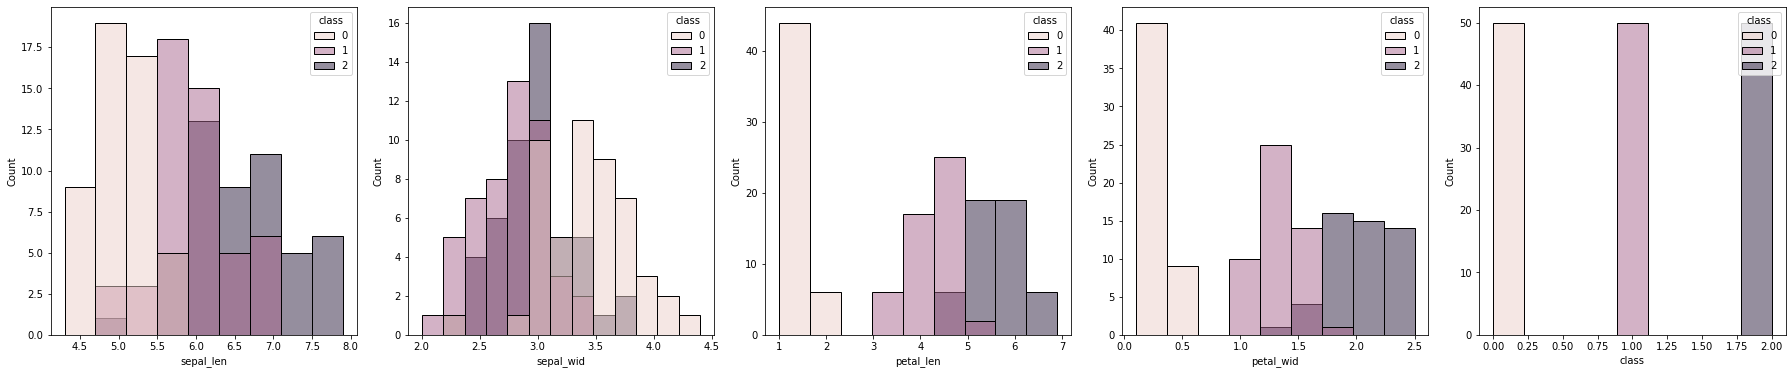

In [5]:
# Informationsanzeige Feature und Plot
analyser_iris.show_feature_info(iris_col[2])
analyser_iris.plot_features(inline=5, color=True)

### DAAT Generator

In [10]:
# Datensatz aus Analyser zurückgeben
ds_an_iris = analyser_iris.dataset
# Datensatz in 70% Training, 15% Test, 15% Validierung und 10% Generator Daten aus den Training aufteilen
ds_iris_train, ds_iris_test, ds_iris_val, ds_iris_gen = daat_test.split_data_val(ds_an_iris, iris_tar,0.7,0.15,0.15,0.1)

# Datensatz in 70% Training, 30% Test und 10% Generator aus allen aufteilen
ds_iris_train, ds_iris_test, ds_iris_gen = daat_test.split_data_from_all(ds_an_iris, iris_tar,0.7,0.15,0.15,0.1)

complete:     150 
train data:   105   0.70 
test data:     23   0.15 
val data:      22   0.15 
gen data:      16   0.11 
complete:     150 
train data:   105   0.70 
test data:     45   0.30 
gen data:      23   0.15 


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

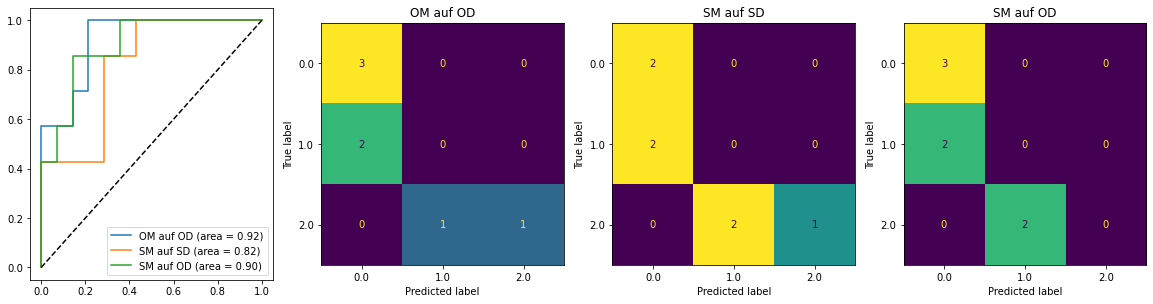

Auswertung Setup mit linearer SVC
Modell          | Accuracy   | Precision  | Recall     | F1        
OM auf OD       | 0.57       | 0.53       | 0.50       | 0.47      
SM auf SD       | 0.43       | 0.50       | 0.44       | 0.39      
SM auf OD       | 0.43       | 0.20       | 0.33       | 0.25      


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

0

In [12]:
# Generator initialisieren 
aug_iris = daat.Generator(ds_iris_gen, iris_col[4])

# Instruktionen für jedes Feature definieren und hinzufügen
aug_iris.add_instruction(daat_ins('sepal_len', daat.Gen_Distribution()))
aug_iris.add_instruction(daat_ins('sepal_wid', daat.Gen_Cluster(3), 'sepal_len'))
aug_iris.add_instruction(daat_ins('petal_len', daat.Gen_Distribution()))
aug_iris.add_instruction(daat_ins('petal_wid', daat.Gen_Cluster(3), 'petal_len'))

# Instruktionskontrollvergleich auf Gen-Data (optional)
aug_iris.verify_setup(balance=True)

# künstliche Daten generieren
aug_iris.generate_syn_data(syn_samples, balance=True)

In [13]:
# Generatortest für 5 Zyklen durchlaufen lassen
daat_test.run_test_class(ds_iris_train, ds_iris_test, ds_iris_val, iris_tar, aug_iris, 
               n_samples=syn_samples, n_labels=3, cycles=5)

processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

2/2 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8889


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

2/2 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8667


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

2/2 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8889


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

2/2 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8444


processing classes:   0%|          | 0/3 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

generating features:   0%|          | 0/4 [00:00<?, ?it/s]

2/2 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8889
Evaluation
Modell          | Accuracy   | Precision  | Recall     | F1        
----------------------------------------------------------------------
Orginal         |      0.333 |      0.333 |      0.333 |      0.333
Artificial      |      0.889 |      0.889 |      0.889 |      0.889
Orginal         |      0.222 |      0.222 |      0.222 |      0.222
Artificial      |      0.867 |      0.867 |      0.867 |      0.867
Orginal         |      0.333 |      0.333 |      0.333 |      0.333
Artificial      |      0.889 |      0.889 |      0.889 |      0.889
Orginal         |      0.333 |      0.333 |      0.333 |      0.333
Artificial      |      0.844 |      0.844 |      0.844 |      0.844
Orginal         |      0.333 |      0.333 |      0.333 |      0.333
Artificial      |      0.889 |      0.889 |      0.889 |      0.889
Org. Accuracy:  0.311
Org. Precision: 0.311
Org. Recall:    0.311
Org. F1:        0.3

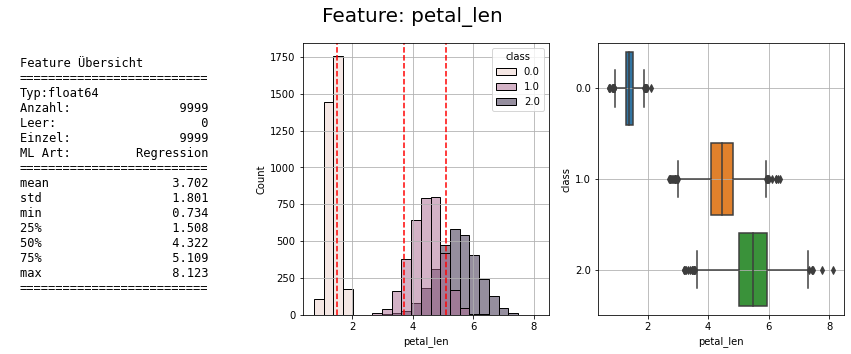

plotting data:   0%|          | 0/5 [00:00<?, ?it/s]

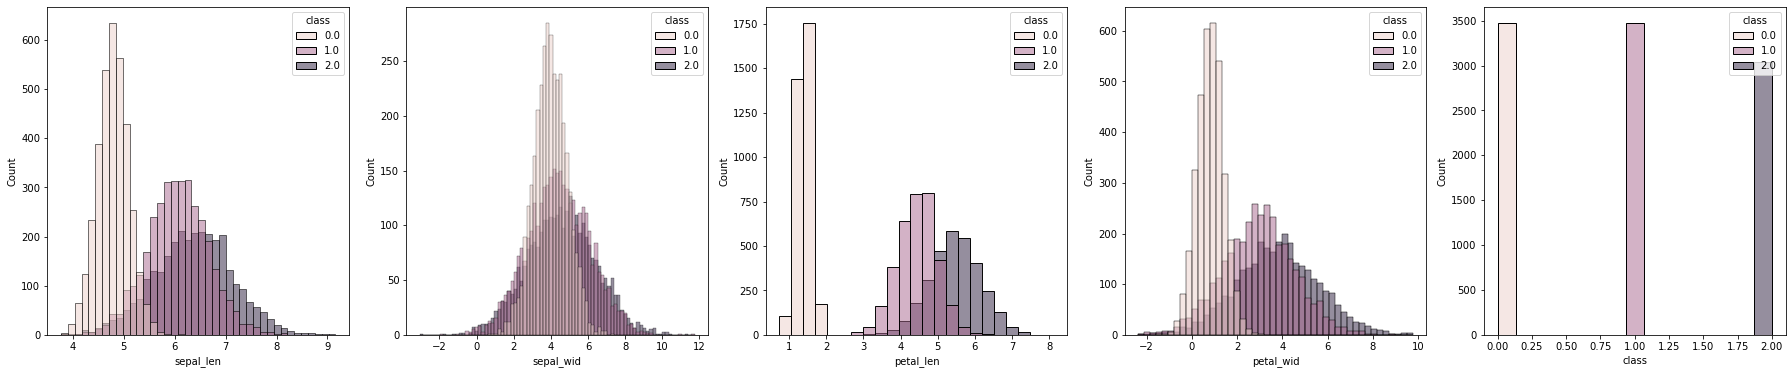

In [14]:
analyser_iris_2 = daat.Analyser(aug_iris.get_syn_data(), iris_tar)
analyser_iris_2.show_feature_info(iris_col[2])
analyser_iris_2.plot_features(inline=5, color=True)

In [16]:
iris_ver = daat.Verification(ds_an_iris, aug_iris.get_syn_data())
iris_ver.eval_class_data_set(iris_tar, 0.7)

fitting SVMs:   0%|          | 0/4 [00:00<?, ?it/s]

Data Set Evaluation
--------------------------------------------------------------------------------------------------------------------------
| Modell     ||         OG 70           ||         Syn 70          ||         OG 100          ||         Syn 100         |
| Metric     ||   OG 30    |   Syn 30   ||   OG 30    |   Syn 30   ||   OG 100   |   Syn 100  ||   OG 100   |   Syn 100  |
--------------------------------------------------------------------------------------------------------------------------
| Accuracy   ||      1.000 |      0.875 ||      1.000 |      1.000 ||      1.000 |      0.633 ||      1.000 |      1.000 |
| Precision  ||      1.000 |      0.613 ||      1.000 |      1.000 ||      1.000 |      0.729 ||      1.000 |      1.000 |
| Recall     ||      1.000 |      0.527 ||      1.000 |      1.000 ||      1.000 |      0.214 ||      1.000 |      1.000 |
| F1         ||      1.000 |      0.566 ||      1.000 |      1.000 ||      1.000 |      0.331 ||      1.000 |      1.00